In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate

In [2]:
R = 3.835e3
C = 75e-9
omega_c = 1/(R*C)
omega_c

3476.7492394611036

# low pass filter

## data

In [14]:
f = np.array([20, 50, 60, 70, 91, 100, 110, 120, 130, 140, 150.5, 175, 220, 250, 275, 300.5, 350, 405, 450, 475, 490, 515, 530, 575, 640, 750, 870, 920, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 2000, 2200, 2400, 2500, 3000, 3250, 3550, 4050, 4500, 5050, 6200, 9050, 12000, 15050, 17500, 20000])
Vo = np.array([7.4, 7.4, 7.2, 7.2,  7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7, 6.8, 6.8, 6.8, 6.6, 6.6, 6, 5.6, 5.2, 5.2, 5.2, 5.1, 4.8, 4.5, 4.4, 4, 3.6, 3.6, 3.3, 2.9, 2.8, 2.6, 2.24, 2.16, 2.08, 2, 1.84, 1.68, 1.6, 1.52, 1.4, 1.2, 1.12, 0.960, 0.88, 0.86, 0.76, 0.64, 0.44, 0.32, 0.248, 0.216, 0.184])
phi = np.array([0, 4, 8, 10, 11, 11, 12, 15, 17, 18, 19, 24, 25, 28, 31, 34, 35, 37, 38, 43, 45, 47, 49, 52, 53, 56, 59, 63, 67, 70, 73, 75, 76, 76, 79, 80, 80, 86, 88, 89, 90, 90, 86, 82, 83, 86, 89, 90, 90, 87, 88, 88, 86])*(-1)

## computation

In [15]:
Vi = 7.5
omega_by_omega_c = 2*np.pi*f/omega_c
H_jw_obs = Vo/Vi
H_jw_dB = 20*np.log10(H_jw_obs)
H_jw_comp = 1/np.sqrt(1+np.power(omega_by_omega_c, 2))
phi_comp = -np.arctan(omega_by_omega_c)*180/np.pi

In [16]:
headers = ['f', 'w/w_c', 'Vo', '|H(jw)| (obs)', '|H(jw)| (dB)', '|H(jw)| (comp)', 'phi (obs)', 'phi (comp)']
print(tabulate(np.array([f, np.round(omega_by_omega_c,2), Vo, np.round(H_jw_obs, 3), np.round(H_jw_dB,3), np.round(H_jw_comp, 3), phi, np.round(phi_comp)]).transpose(), headers=headers))

      f    w/w_c     Vo    |H(jw)| (obs)    |H(jw)| (dB)    |H(jw)| (comp)    phi (obs)    phi (comp)
-------  -------  -----  ---------------  --------------  ----------------  -----------  ------------
   20       0.04  7.4              0.987          -0.117             0.999            0            -2
   50       0.09  7.4              0.987          -0.117             0.996           -4            -5
   60       0.11  7.2              0.96           -0.355             0.994           -8            -6
   70       0.13  7.2              0.96           -0.355             0.992          -10            -7
   91       0.16  7.2              0.96           -0.355             0.987          -11            -9
  100       0.18  7.2              0.96           -0.355             0.984          -11           -10
  110       0.2   7.2              0.96           -0.355             0.981          -12           -11
  120       0.22  7.2              0.96           -0.355             0.977        

## graphs

Text(0.05, -15, '$\\longleftarrow$Pass Band$\\longrightarrow$')

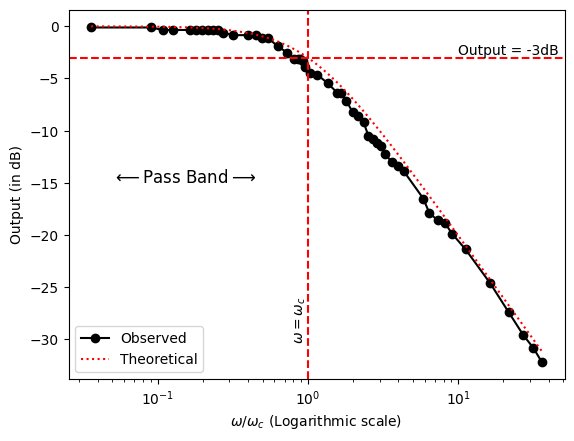

In [8]:
plt.plot(omega_by_omega_c, H_jw_dB, '-ko', label='Observed')
plt.plot(omega_by_omega_c, 20*np.log10(H_jw_comp), ':r', label='Theoretical')
plt.xscale('log')
plt.axhline(y=-3, color='r', linestyle='--')
plt.axvline(x=1, color='r', linestyle='--')
plt.xlabel('$\omega/\omega_c$ (Logarithmic scale)')
plt.ylabel('Output (in dB)')
plt.legend()
plt.text(10, -3+0.3, 'Output = -3dB')
plt.text(0.8, -30, '$\omega=\omega_c$', rotation=90)
plt.text(0.05, -15, r"$\longleftarrow$Pass Band$\longrightarrow$", fontsize=12)

Text(0.8, -90, '$\\omega=\\omega_c$')

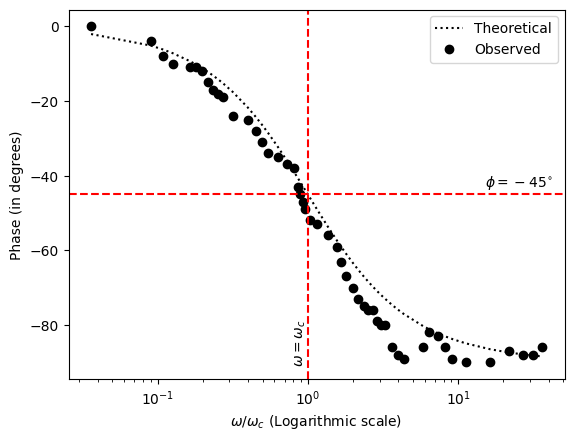

In [9]:
plt.plot(omega_by_omega_c, phi_comp, ':k', label='Theoretical')
plt.plot(omega_by_omega_c, phi, 'ko', label='Observed')
plt.xscale('log')
plt.axhline(y=-45, color='r', linestyle='--')
plt.axvline(x=1, color='r', linestyle='--')
plt.xlabel('$\omega/\omega_c$ (Logarithmic scale)')
plt.ylabel('Phase (in degrees)')
plt.legend()
plt.text(15, -43, '$\phi = -45^{\circ}$')
plt.text(0.8, -90, '$\omega=\omega_c$', rotation=90)

# high pass filter

## data

In [10]:
f_ = np.array([20, 50.5, 75, 100, 126.5, 150.5, 175, 200.5, 230.5, 260.5, 295.5, 335, 385, 440, 455, 460, 480, 500, 530, 565, 595, 640, 700, 775, 830, 920, 1000, 1190, 1310, 1445, 1895, 2010, 2540, 3075, 3800, 4400, 5200, 6500, 8900, 11500, 15950, 18200, 20000])
Vo_ = np.array([0.336, 0.792, 1.15, 1.52, 1.92, 2.18, 2.48, 2.72, 3.08, 3.40, 3.72, 4.08, 4.40, 4.80, 4.80, 4.80, 4.88, 5, 5.12, 5.36, 5.44, 5.52, 5.76, 5.96, 6.13, 6.16, 6.32, 6.52, 6.6, 6.64, 6.8, 6.8, 6.8, 6.96, 7, 7.04, 7.04, 7.04, 7.04, 7.04, 7.04, 7.04, 7.04, ])
phi_ = np.array([90, 82, 80, 75, 73, 70, 70, 68, 62, 60, 57, 53, 50, 46, 45, 45, 45, 43, 41, 40, 38, 35, 30, 28, 27, 26, 24, 20, 18, 16, 13, 12, 11, 8, 5, 6, 3, 3, 2, 3, 2, 0, 0])

## computation

In [11]:
Vi_ = 7.53
omega_by_omega_c_ = 2*np.pi*f_/omega_c
H_jw_obs_ = Vo_/Vi_
H_jw_dB_ = 20*np.log10(H_jw_obs_)
H_jw_comp_ = 1/np.sqrt(1+np.power(1/omega_by_omega_c_, 2))
phi_comp_ = np.arctan(1/omega_by_omega_c_)*180/np.pi

In [12]:
tab_ = np.array([f_, np.round(omega_by_omega_c_, 2), Vo_, np.round(H_jw_obs_, 3), np.round(H_jw_dB_,2), np.round(H_jw_comp_, 3), phi_, np.round(phi_comp_)]).transpose()
print(tabulate(tab_, headers=headers))

      f    w/w_c     Vo    |H(jw)| (obs)    |H(jw)| (dB)    |H(jw)| (comp)    phi (obs)    phi (comp)
-------  -------  -----  ---------------  --------------  ----------------  -----------  ------------
   20       0.04  0.336            0.045          -27.01             0.036           90            88
   50.5     0.09  0.792            0.105          -19.56             0.091           82            85
   75       0.14  1.15             0.153          -16.32             0.134           80            82
  100       0.18  1.52             0.202          -13.9              0.178           75            80
  126.5     0.23  1.92             0.255          -11.87             0.223           73            77
  150.5     0.27  2.18             0.29           -10.77             0.262           70            75
  175       0.32  2.48             0.329           -9.65             0.302           70            72
  200.5     0.36  2.72             0.361           -8.84             0.341        

## graphs

Text(2.5, -15, '$\\longleftarrow$Pass Band$\\longrightarrow$')

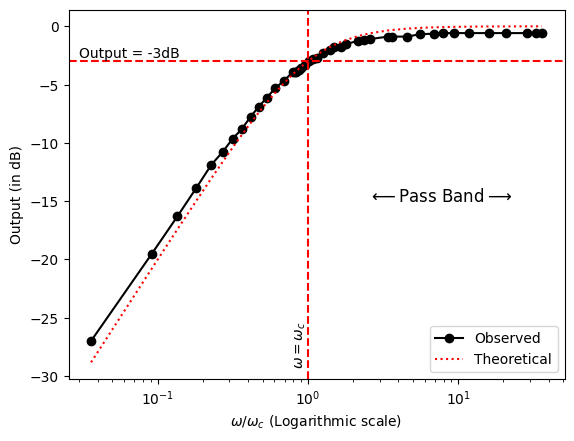

In [194]:
plt.plot(omega_by_omega_c_, H_jw_dB_, '-ko', label='Observed')
plt.plot(omega_by_omega_c_, 20*np.log10(H_jw_comp_), ':r', label='Theoretical')
plt.xscale('log')
plt.axhline(y=-3, color='r', linestyle='--')
plt.axvline(x=1, color='r', linestyle='--')
plt.xlabel('$\omega/\omega_c$ (Logarithmic scale)')
plt.ylabel('Output (in dB)')
plt.legend()
plt.text(0.03, -2.7, 'Output = -3dB')
plt.text(0.8, -29, '$\omega=\omega_c$', rotation=90)
plt.text(2.5, -15, r"$\longleftarrow$Pass Band$\longrightarrow$", fontsize=12)

Text(0.8, 0, '$\\omega=\\omega_c$')

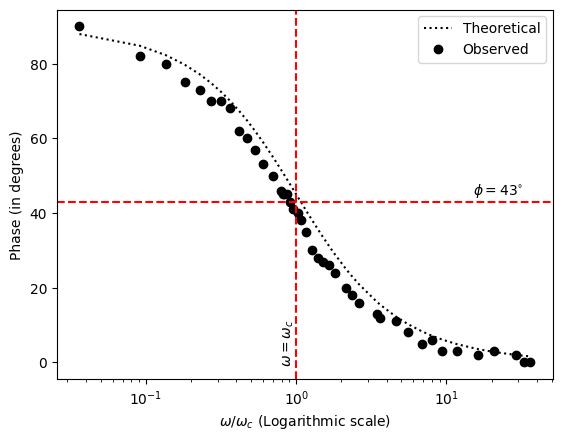

In [156]:
plt.plot(omega_by_omega_c_, phi_comp_, ':k', label='Theoretical')
plt.plot(omega_by_omega_c_, phi_, 'ko', label='Observed')
plt.xscale('log')
plt.axhline(y=43, color='r', linestyle='--')
plt.axvline(x=1, color='r', linestyle='--')
plt.xlabel('$\omega/\omega_c$ (Logarithmic scale)')
plt.ylabel('Phase (in degrees)')
plt.legend()
plt.text(15, 45, '$\phi = 43^{\circ}$')
plt.text(0.8, 0, '$\omega=\omega_c$', rotation=90)